<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Group project - Political Media

---

Predict the message classes in the column `message` from the file `Political-media-DFE.csv`. Extract text data and include it into your modeling. 

Use the given train-test split and evaluate your model on the test set. During training you are not allowed to use any information from the test set.

The data stems from https://www.figure-eight.com/wp-content/uploads/2016/03/Political-media-DFE.csv.

In [10]:
import pandas as pd

In [24]:
df = pd.read_csv('Political-media-DFE.csv', encoding='latin')
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'audience', 'audience:confidence', 'bias',
       'bias:confidence', 'message', 'message:confidence', 'orig__golden',
       'audience_gold', 'bias_gold', 'bioid', 'embed', 'id', 'label',
       'message_gold', 'source', 'text'],
      dtype='object')

In [33]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [36]:
df.bias.unique()

array(['partisan', 'neutral'], dtype=object)

#### Use the following train-test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_train, df_test = train_test_split(
    df, test_size=0.2, stratify=df.message, random_state=1)

In [14]:
df.shape

(5000, 21)

In [15]:
df_train.message.unique()

array(['policy', 'information', 'personal', 'support', 'other', 'media',
       'attack', 'constituency', 'mobilization'], dtype=object)

In [17]:
df_train.text[100]

'St. Robert Community Center, 114 JH Williamson Dr. In St. Robert (2 of 3)'

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()


In [108]:
cvec.fit(df_train.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [109]:
words = cvec.get_feature_names()
print(words[5000:5020])
print()


['eira', 'eisenhower', 'either', 'ejc4eozalh', 'ejm6vneafr', 'ektcxnza1e', 'el', 'elaina32', 'elam', 'elana', 'elant', 'elbert', 'eleanor', 'eleanornorton', 'elecciones', 'elect', 'elected', 'election', 'elections', 'elections2014']



In [110]:
len(cvec.get_feature_names())


15784

In [126]:
cvec_mat = cvec.transform(df_train.text)
cvec_mat_test = cvec.transform(df_test.text)


In [112]:
type(cvec_mat)

scipy.sparse.csr.csr_matrix

In [101]:
cvek_mat = pd.DataFrame(cvec_mat)

In [104]:
cvek_mat.shape

(4000, 1)

In [113]:
df_train.shape

(4000, 21)

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns


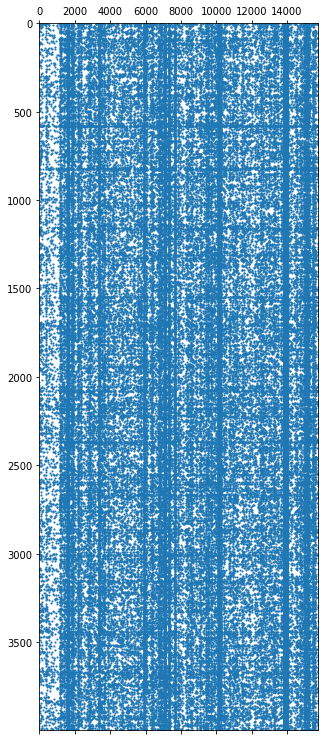

In [115]:
plt.figure(figsize=(5, 200))
plt.spy(cvec_mat, markersize=1, aspect=10)
plt.show()


In [116]:
cvec_mat.sum(axis=0)

matrix([[34, 74,  2, ...,  1,  1,  1]], dtype=int64)

In [117]:
common_words = cvec_mat.sum(axis=0)
pd.DataFrame(common_words, columns=words).transpose().sort_values(by=0, ascending=False)[:20]


,0
the,6202
to,4794
and,2965
of,2731
in,2363
http,1734
for,1707
on,1435
co,1408
is,1112


In [120]:
common_words = cvec_mat[df_train.text == 1].sum(axis=0)
pd.DataFrame(common_words, columns=words).transpose().sort_values(by=0, ascending=False)[:20]


,0
is,8000
precious,4000
rt,4000
abortion,4000
every,4000
gosnell,4000
irtl,4000
toddrokita,4000
tragedy,4000
therefore,4000


In [65]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
def word_counter(mat):
    count = np.array(mat.sum(axis=0))[0]
    return count
csum = word_counter(cvec_mat)
csum
cvec_mat.sum(axis=0)


matrix([[34, 74,  2, ...,  1,  1,  1]], dtype=int64)

In [70]:
from operator import itemgetter
def word_frequency_sorter(words, counts):
    sort_result = sorted(zip(words, list(counts)),
                         key=itemgetter(1), reverse=True)
    return sort_result


In [71]:
df_word_frequency = pd.DataFrame(word_frequency_sorter(
    words, csum), columns=['word', 'frequency'])
df_word_frequency.set_index('word', inplace=True)
df_word_frequency.head(20)


,frequency
word,
http,1734
today,667
ûªs,559
house,409
amp,354
great,315
new,289
president,280
day,244


In [72]:
df_cvec = pd.DataFrame(cvec_mat.toarray(), columns=cvec.get_feature_names())
df_cvec.sum(axis=0).sort_values(ascending=False)[:10]


http         1734
today         667
ûªs           559
house         409
amp           354
great         315
new           289
president     280
time          244
day           244
dtype: int64

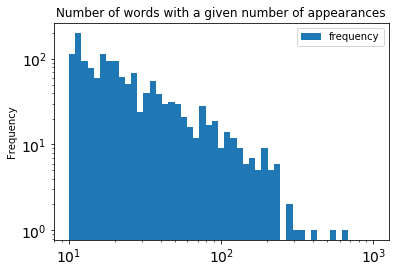

In [73]:
df_word_frequency.plot(kind='hist',
                       bins=np.logspace(1, 3, 50),
                       loglog=True,
                       title='Number of words with a given number of appearances',
                       fontsize=14)
plt.show()


In [77]:
df_word_frequency = {}
for i in range(4):
    csum_i = word_counter(cvec_mat[df_train.message == i, :])
    df_word_frequency[i] = pd.DataFrame(word_frequency_sorter(
        words, csum_i), columns=['word', 'frequency'])
    df_word_frequency[i].set_index('word', inplace=True)
    print(df_train.message[i])
    print(df_word_frequency[i].head(20))
    print()


policy
              frequency
word                   
abortion           4000
gosnell            4000
irtl               4000
life               4000
precious           4000
rt                 4000
toddrokita         4000
tragedy            4000
00                    0
000                   0
000th                 0
0017a43b2370          0
001a4bcf6878          0
00am                  0
00amct                0
00kq8qqlaa            0
00pm                  0
01                    0
010914                0
019                   0

attack
              frequency
word                   
abortion           4000
gosnell            4000
irtl               4000
life               4000
precious           4000
rt                 4000
toddrokita         4000
tragedy            4000
00                    0
000                   0
000th                 0
0017a43b2370          0
001a4bcf6878          0
00am                  0
00amct                0
00kq8qqlaa            0
00pm                  0
0

X_train = cvec_mat
y_train = data_train.target
X_test = cvec.transform(data_test.data)
y_test = data_test.target

In [86]:
X_train = cvec_mat
y_train = df_train.message



In [129]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(cvec_mat_test, y_test))


0.98525


NameError: name 'y_test' is not defined

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def docm(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if labels is not None:
        cols = ['p_'+c for c in labels]
        df = pd.DataFrame(cm, index=labels, columns=cols)
    else:
        cols = ['p_'+str(i) for i in range(len(cm))]
        df = pd.DataFrame(cm, columns=cols)
    return df

In [90]:
docm(df_train.message, lr.predict(X_train))

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8
0,132,0,1,0,0,0,1,2,1
1,0,118,0,0,0,0,4,0,0
2,0,0,511,0,0,0,3,2,2
3,0,0,0,218,0,0,3,0,0
4,0,0,0,0,99,0,1,2,1
5,0,0,0,0,0,90,3,2,2
6,0,0,0,0,0,0,933,3,0
7,0,0,1,1,0,0,7,1120,0
8,0,0,0,2,0,0,10,5,720


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [128]:
model = make_pipeline(TfidfVectorizer(stop_words='english',
                                      # sublinear_tf=True,
                                      max_df=0.3,
                                      max_features=4000
                                      ),
                      LogisticRegression(solver='lbfgs', multi_class='ovr'),
                      )
model.fit(X_train, y_train)
y_pred = model.predict(cvec_mat_test)
print(accuracy_score(cvec_mat_test, y_pred))
print("Number of features:", len(model.steps[0][1].get_feature_names()))


AttributeError: lower not found

In [127]:
#cvec_mat_test = cvec.transform(df_test.text)


In [130]:
df_test

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
3070,766195556,False,finalized,1,8/5/15 6:05,national,1.0,partisan,1.0,personal,...,NaN,NaN,NaN,D000614,"<div id=""fb-root""></div> <script>(function(d, ...",119657691436457_602369246498630,From: Sean Duffy (Representative from Wisconsin),NaN,facebook,Proud to vote today for a responsible budget t...
3169,766195655,False,finalized,1,8/5/15 6:01,national,1.0,partisan,1.0,personal,...,NaN,NaN,NaN,E000293,"<div id=""fb-root""></div> <script>(function(d, ...",292076514228382_334365816666118,From: Elizabeth Esty (Representative from Conn...,NaN,facebook,"Today, I joined colleagues in writing to House..."
3581,766196067,False,finalized,1,8/5/15 5:48,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,H001065,"<div id=""fb-root""></div> <script>(function(d, ...",384164668340890_641004062656948,From: George Holding (Representative from Nort...,NaN,facebook,A doctor explains Obamacare's devastating effe...
4768,766197255,False,finalized,1,8/5/15 6:01,constituency,1.0,neutral,1.0,support,...,NaN,NaN,NaN,T000464,"<div id=""fb-root""></div> <script>(function(d, ...",210573031664_10151469346531665,From: Jon Tester (Senator from Montana),NaN,facebook,"Congratulations to Montana's Jarrett Guyer, Ja..."
1167,766193652,False,finalized,1,8/4/15 21:10,national,1.0,neutral,1.0,information,...,NaN,NaN,NaN,C001056,"<blockquote class=""twitter-tweet"" width=""450"">...",4.71465E+17,From: John Cornyn (Senator from Texas),NaN,twitter,Update: Las Vegas man vandalizes El Paso billb...
3787,766196273,False,finalized,1,8/5/15 5:24,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,L000551,"<div id=""fb-root""></div> <script>(function(d, ...",92190287786_10151761767777787,From: Barbara Lee (Representative from Califor...,NaN,facebook,Tomorrow the Supreme Court will hear oral argu...
2177,766194663,False,finalized,1,8/5/15 5:33,national,1.0,neutral,1.0,mobilization,...,NaN,NaN,NaN,D000607,"<blockquote class=""twitter-tweet"" width=""450"">...",3.01747E+17,From: Joe Donnelly (Senator from Indiana),NaN,twitter,Joe voted for #VAWA because we need to stand u...
384,766192869,False,finalized,1,8/4/15 20:09,national,1.0,neutral,1.0,personal,...,NaN,NaN,NaN,R000591,"<blockquote class=""twitter-tweet"" width=""450"">...",5.37754E+17,From: Martha Roby (Representative from Alabama),NaN,twitter,Just finished making mac n cheese for turkey d...
3248,766195734,False,finalized,1,8/5/15 5:33,national,1.0,neutral,1.0,information,...,NaN,NaN,NaN,F000456,"<div id=""fb-root""></div> <script>(function(d, ...",372154186772_10152384479176773,From: John Fleming (Representative from Louisi...,NaN,facebook,First quarter of ObamaCare implementationÛ_ E...
4603,766197089,False,finalized,1,8/5/15 5:33,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,S001157,"<div id=""fb-root""></div> <script>(function(d, ...",113303673339_10151576515338340,From: David Scott (Representative from Georgia),NaN,facebook,http://www.wsbtv.com/news/news/local/ga-delega...
